<a href="https://colab.research.google.com/github/mbz4/DAQSP-Course-Scripts/blob/main/motion_planning_lecture_21_09_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python Script for goal-reaching single integrator system




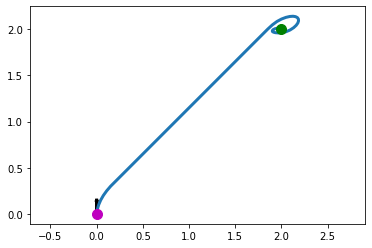

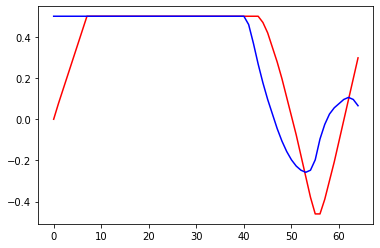

In [ ]:


from numpy import *
import matplotlib.pyplot as plt
import scipy.io



x_init = 0.0
y_init = 0.0

x_fin = 2.0
y_fin = 2.0


vx_init = 0.0
vy_init = 0.5

ax_init = 0.1
ay_init = 0.1


maxiter = 100

num_samples = 100
delt = 1.0

vx = linspace(-0.5, 0.5, num_samples) ################ velocity options for x direction
vy = linspace(-0.5, 0.5, num_samples) ############# velocity options for y direction

vx_grid, vy_grid = meshgrid(vx, vy) #################### matrix for possible velocities

# t = linspace(0, 0.3, num_horizon  )

t = 0.1

x = x_init*ones(maxiter)
y = y_init*ones(maxiter)
#
# vx = vx_init*ones(maxiter)
# vy = vy_init*ones(maxiter)
#
# ax = ax_init*ones(maxiter)
# ay = ay_init*ones(maxiter)
#
#
vx = vx_init*ones(maxiter)
vy = vy_init*ones(maxiter)

#
# dist_goal = (x_fin-x_temp)**2+(y_fin-y_temp)**2



# print(unravel_index(dist_goal.argmin(), dist_goal.shape))


x_temp = ones(( num_samples, num_samples  ))
y_temp = ones(( num_samples, num_samples  ))

w_s = 0.5

for i in range(1, maxiter):

    # for k in range(0, num_samples):
    #     for l in range(0, num_samples):
    #         x_temp[k, l] = x[i-1]+vx_grid[k, l]*t
    #         y_temp[k, l] = y[i-1]+vy_grid[k, l]*t

    x_temp = x[i-1]+vx_grid*t
    y_temp = y[i-1]+vy_grid*t

    smoothness_cost = ( (vx_grid-vx[i-1])**2+(vy_grid-vy[i-1])**2   )
    dist_goal = sqrt((x_fin-x_temp)**2+(y_fin-y_temp)**2)
    cost = dist_goal+w_s*smoothness_cost

    argmin_index = unravel_index(cost.argmin(), cost.shape)

    vx[i] = vx_grid[argmin_index]
    vy[i] = vy_grid[argmin_index]

    x[i] = x[i-1]+vx[i]*t
    y[i] = y[i-1]+vy[i]*t
    #
    # vx[i] = clip(vx[i-1]+ax[i-1]*t+(1/2.0)*jx[i]*t**2, -0.5, 0.5)
    # vy[i] = clip(vy[i-1]+ay[i-1]*t+(1/2.0)*jy[i]*t**2, -0.5, 0.5)
    #
    # ax[i] = clip(ax[i-1]+jx[i]*t, -0.5, 0.5)
    # ay[i] = clip(ay[i-1]+jy[i]*t, -0.5, 0.5)

    # print(argmin_index)

    if(dist_goal[argmin_index]<0.02):
        break



#
# scipy.io.savemat('x_0.3.mat', {'x': x[0:i]}) ########### matrix for x position of the vehicle
# scipy.io.savemat('y_0.3.mat', {'y': y[0:i]}) ########## matrix of y position of the vehicle


plt.figure(1)
plt.plot(x[0:i], y[0:i], linewidth = 3.0)

plt.arrow(x_init, y_init, x_init+vx_init*0.3, y_init+vy_init*0.3, linewidth = 3.0)
plt.plot(x_init*ones(1), y_init*ones(1), 'om', markersize = 10.0)
plt.plot(x_fin*ones(1), y_fin*ones(1), 'og', markersize = 10.0)


plt.axis('equal')


plt.figure(2)
plt.plot(vx[0:i], '-r')
plt.plot(vy[0:i], '-b')


plt.show()


Python Script for Converging to a straight line

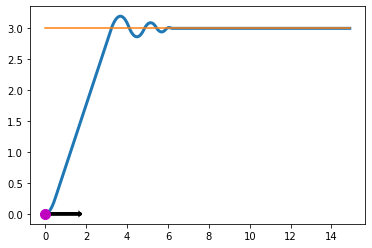

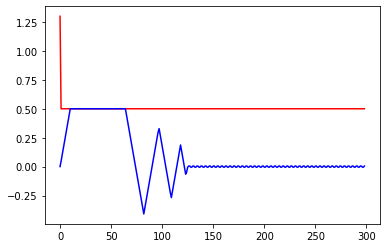

In [1]:


from numpy import *

import matplotlib.pyplot as plt
import time


x_init = 0.0
y_init = 0.0

vx_init = 1.3
vy_init = 0.0

y_fin = 3.0


maxiter = 300

num_samples = 100
delt = 1.0

vx = linspace(-0.5, 0.5, num_samples)
vy = linspace(-0.5, 0.5, num_samples)

vx_grid, vy_grid = meshgrid(vx, vy)


t = 0.1

x = x_init*ones(maxiter)
y = y_init*ones(maxiter)

vx = vx_init*ones(maxiter)
vy = vy_init*ones(maxiter)

ws = 1.0


for i in range(1, maxiter):

    x_temp = x[i-1]+vx_grid*t
    y_temp = y[i-1]+vy_grid*t


    dist_goal = sqrt((y_fin-y_temp)**2)+ws*( (vx_grid-vx[i-1])**2+(vy_grid-vy[i-1])**2   )

    argmin_index = unravel_index(dist_goal.argmin(), dist_goal.shape)

    vx[i] = vx_grid[argmin_index]
    vy[i] = vy_grid[argmin_index]

    x[i] = x[i-1]+vx[i]*t
    y[i] = y[i-1]+vy[i]*t
    #
    # vx[i] = clip(vx[i-1]+ax[i-1]*t+(1/2.0)*jx[i]*t**2, -0.5, 0.5)
    # vy[i] = clip(vy[i-1]+ay[i-1]*t+(1/2.0)*jy[i]*t**2, -0.5, 0.5)
    #
    # ax[i] = clip(ax[i-1]+jx[i]*t, -0.5, 0.5)
    # ay[i] = clip(ay[i-1]+jy[i]*t, -0.5, 0.5)

    # print(argmin_index)

    # if(dist_goal[argmin_index]<0.02):
        # break




# scipy.io.savemat('x_0.3.mat', {'x': x[0:i]}) ########### matrix for x position of the vehicle
# scipy.io.savemat('y_0.3.mat', {'y': y[0:i]}) ########## matrix of y position of the vehicle


plt.figure(1)
plt.plot(x[0:i], y[0:i], linewidth = 3.0)

plt.arrow(x_init, y_init, x_init+vx_init*1.3, y_init+vy_init*0.3, linewidth = 3.0)
plt.plot(x_init*ones(1), y_init*ones(1), 'om', markersize = 10.0)
plt.plot(x[0:i], y_fin*ones(i) )


# plt.axis('equal')


plt.figure(2)
plt.plot(vx[0:i], '-r')
plt.plot(vy[0:i], '-b')


plt.show()


(-0.0012926110244465628,
 0.027144831513377817,
 -0.0012926110244465628,
 0.027144831513377817)

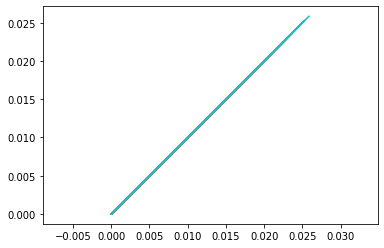

In [5]:
'''
import numpy as np
import matplotlib.pyplot as plt
num = 5
v = np.linspace(0, 1)
phi = np.linspace(-np.pi/4, np.pi/4)

x_0 = 0.0
y_0 = 0.0

v_grid, phi_grid = np.meshgrid(v, phi)
num_horizon = 50

t = np.linspace(0, 0.4, num_horizon)

x_traj = np.ones((num**2, num_horizon))
y_traj = np.ones((num**2, num_horizon))

count = 0 

for i in range(0, num):
  for j in range(0, num):

    x_traj[count] = x_0+v_grid[i,j]*np.cos(phi_grid[i,j])*t
    y_traj[count]=x_0+v_grid[i,j]*np.cos(phi_grid[i,j])*t
    count = count + 1

plt.plot(x_traj, y_traj)
plt.axis('equal')
'''

Python Script for Trajectory Tracking with a single integrator system

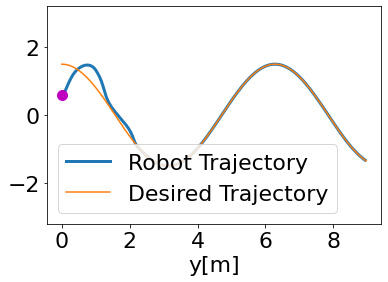

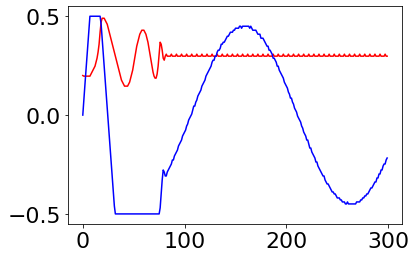

In [ ]:

from numpy import *
import matplotlib.pyplot as plt

x_init = 0.0
y_init = 0.6

vx_init = 0.2
vy_init = 0.0


maxiter = 18300

num_samples = 100
delt = 1.0

vx = linspace(-0.5, 0.5, num_samples)
vy = linspace(-0.5, 0.5, num_samples)

vx_grid, vy_grid = meshgrid(vx, vy)

# t = linspace(0, 0.3, num_horizon  )

delt = 0.10

x = x_init*ones(maxiter)
y = y_init*ones(maxiter)

vx = vx_init*ones(maxiter)
vy = vy_init*ones(maxiter)


# x_des = 1.5*sin(0.3*t)
# y_des = 1.5*cos(0.3*t)

x_des_tr = ones(maxiter-1)
y_des_tr = ones(maxiter-1)


t = 0.0

for i in range(1, maxiter):
    x_des = x_init+0.3*t
    y_des = 1.5*cos(0.3*t)

    x_temp = x[i-1]+vx_grid*delt
    y_temp = y[i-1]+vy_grid*delt


    dist_goal = sqrt((x_des-x_temp)**2+(y_des-y_temp)**2)+0.7*( (vx_grid-vx[i-1])**2+(vy_grid-vy[i-1])**2   )

    argmin_index = unravel_index(dist_goal.argmin(), dist_goal.shape)

    vx[i] = vx_grid[argmin_index]
    vy[i] = vy_grid[argmin_index]

    x[i] = x[i-1]+vx[i]*delt
    y[i] = y[i-1]+vy[i]*delt
    #
    # vx[i] = clip(vx[i-1]+ax[i-1]*t+(1/2.0)*jx[i]*t**2, -0.5, 0.5)
    # vy[i] = clip(vy[i-1]+ay[i-1]*t+(1/2.0)*jy[i]*t**2, -0.5, 0.5)
    #
    # ax[i] = clip(ax[i-1]+jx[i]*t, -0.5, 0.5)
    # ay[i] = clip(ay[i-1]+jy[i]*t, -0.5, 0.5)

    x_des_tr[i-1] = x_des
    y_des_tr[i-1] = y_des


    # print(argmin_index)
    t = t+delt

    if(t>=30.0):
        break




# scipy.io.savemat('x_0.3.mat', {'x': x[0:i]}) ########### matrix for x position of the vehicle
# scipy.io.savemat('y_0.3.mat', {'y': y[0:i]}) ########## matrix of y position of the vehicle

plt.rcParams.update({'font.size': 22})
plt.figure(1)
plt.plot(x[0:i], y[0:i], linewidth = 3.0, label = 'Robot Trajectory')

# plt.arrow(x_init, y_init, x_init+vx_init*0.3, y_init+vy_init*0.3, linewidth = 3.0)
plt.plot(x_init*ones(1), y_init*ones(1), 'om', markersize = 10.0)
plt.plot(x_des_tr[0:i], y_des_tr[0:i], linewidth = 1.5, label = 'Desired Trajectory')
# plt.plot(x_fin*ones(1), y_fin*ones(1), 'og', markersize = 10.0)
plt.xlabel('x[m]')
plt.xlabel('y[m]')
plt.legend()

plt.axis('equal')


plt.figure(2)
plt.plot(vx[0:i], '-r')
plt.plot(vy[0:i], '-b')


plt.show()
